In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

In [2]:
N = 100
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
true_density = (0.3*norm(0,1).pdf(X_plot[:,0]) + 0.7*norm(5,1).pdf(X_plot[:,0]))

In [3]:
# Estimate by gaussian mixture model
gmm = GaussianMixture(n_components=2,n_init=3).fit(X)

In [4]:
gmm.converged_

True

In [5]:
gmm.lower_bound_

-2.0268870056875143

In [6]:
# Calculate density for X_plot data
density = np.exp(gmm.score_samples(X_plot))

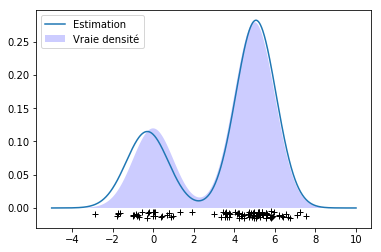

In [7]:
# Display true density and its estimation:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
ax.plot(X_plot[:,0], density, '-', label="Estimation")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax.legend(loc='upper left')
plt.show()

In [11]:
gmm.weights_

array([0.7011166, 0.2988834])

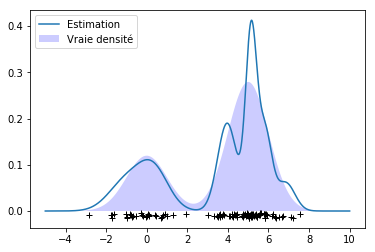

In [10]:
# with different number of components:
gmm1 = GaussianMixture(n_components=6,n_init=3).fit(X)
density1 = np.exp(gmm1.score_samples(X_plot))
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
ax1.plot(X_plot[:,0], density1, '-', label="Estimation")
ax1.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax1.legend(loc='upper left')
plt.show()

In [12]:
gmm1.weights_

array([0.2553968 , 0.17048253, 0.22400188, 0.06809258, 0.12955515,
       0.15247106])

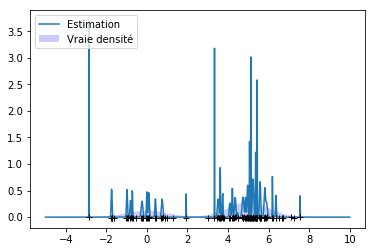

In [16]:
# with different number of components:
gmm1 = GaussianMixture(n_components=45,n_init=3).fit(X)
density1 = np.exp(gmm1.score_samples(X_plot))
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
ax1.plot(X_plot[:,0], density1, '-', label="Estimation")
ax1.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax1.legend(loc='upper left')
plt.show()

In [ ]:
# We can see that with a great number of parameters the model is overfitted

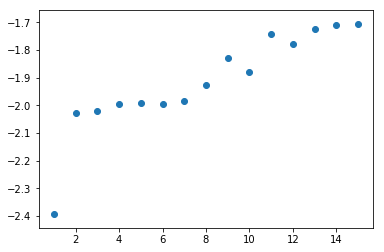

In [15]:
score_list = []
nbr_iter = 15
for n_comp in range(1, nbr_iter+1):
    gmm2 = GaussianMixture(n_components=n_comp,n_init=3).fit(X)
    score_list.append(gmm2.score(X))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.scatter([i for i in range(1, nbr_iter+1)], score_list)
plt.show()  

In [17]:
# Using 2D data:
md1 = 1.5 * np.random.randn(200,2) + [3,3]
md2 = np.random.randn(100,2).dot([[2, 0],[0, 0.8]]) + [-3, 3]
md3 = np.random.randn(100,2) + [3, -3]
md = np.concatenate((md1, md2, md3))

In [18]:
grid_size = 100
Gx = np.arange(-10, 10, 20/grid_size)
Gx.shape

(100,)

In [19]:
Gy = np.arange(-10, 10, 20/grid_size)
Gx, Gy = np.meshgrid(Gx, Gy)
Gx.shape

(100, 100)

In [23]:
# density estimation:
gmm3 = GaussianMixture(n_components=3,n_init=3).fit(md)
gmm3.converged_

True

In [25]:
# Calculate density:
density3 = np.exp(gmm3.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis],
        (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))

<IPython.core.display.Javascript object>


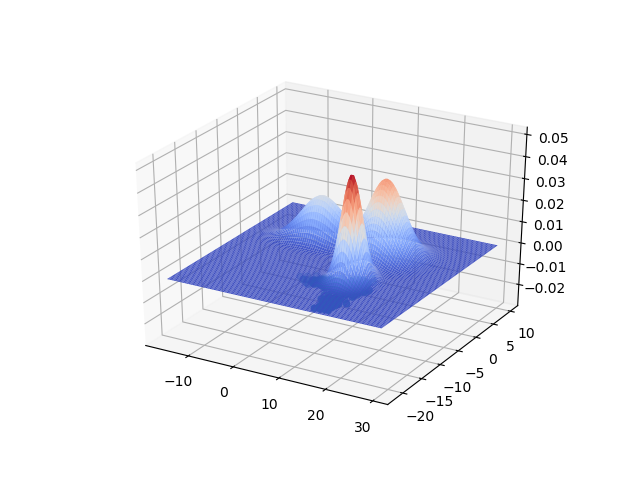

In [68]:
# Display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook
fig3 = plt.figure()
ax3 = fig3.gca(projection='3d')
ax3.plot_surface(Gx, Gy, density3.reshape(grid_size,grid_size), rstride=1,
                    cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax3.scatter(md[:,0], md[:,1], -0.025)
plt.show()

<IPython.core.display.Javascript object>


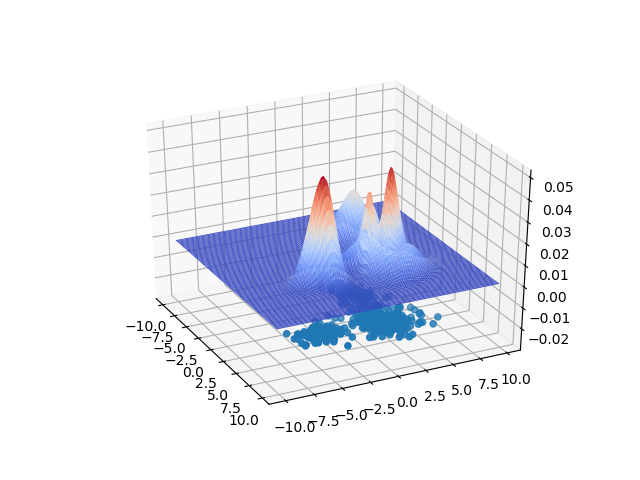

In [30]:
# With different number of components:
gmm4 = GaussianMixture(n_components=10,n_init=3).fit(md)
density4 = np.exp(gmm4.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis],
        (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))

# Display
%matplotlib notebook
fig4 = plt.figure()
ax4 = fig4.gca(projection='3d')
ax4.plot_surface(Gx, Gy, density4.reshape(grid_size,grid_size), rstride=1,
                    cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax4.scatter(md[:,0], md[:,1], -0.025)
plt.show()

<IPython.core.display.Javascript object>


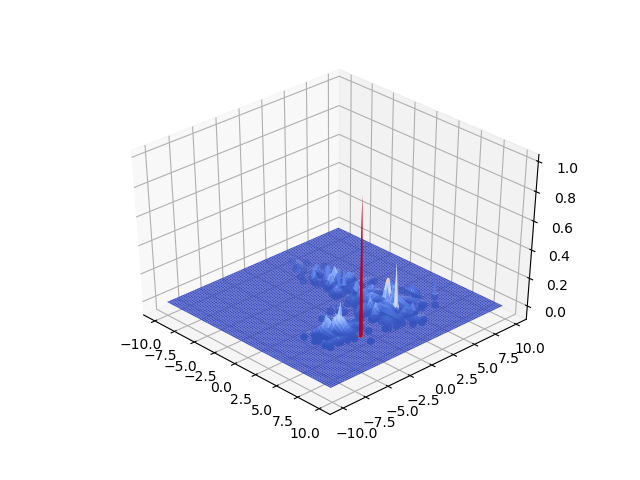

In [33]:
# With different number of components:
gmm4 = GaussianMixture(n_components=50,n_init=3).fit(md)
density4 = np.exp(gmm4.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis],
        (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))

# Display
%matplotlib notebook
fig4 = plt.figure()
ax4 = fig4.gca(projection='3d')
ax4.plot_surface(Gx, Gy, density4.reshape(grid_size,grid_size), rstride=1,
                    cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax4.scatter(md[:,0], md[:,1], -0.025)
plt.show()

<IPython.core.display.Javascript object>


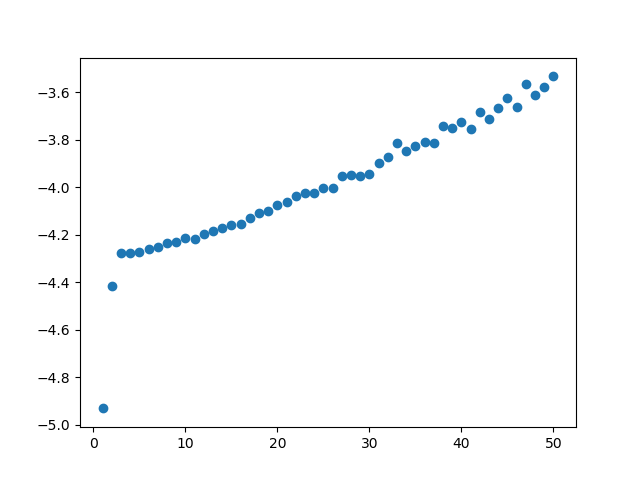

In [32]:
# Display score of log likelihood vs number of components
score_list1 = []
nbr_iter = 50
for n_comp in range(1, nbr_iter+1):
    gmm5 = GaussianMixture(n_components=n_comp,n_init=3).fit(md)
    score_list1.append(gmm5.score(md))
    
fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
ax5.scatter([i for i in range(1, nbr_iter+1)], score_list1)
plt.show() 

In [34]:
# Now we will use AIC and BIC to choose the number of components
n_max = 8    # nombre de valeurs pour n_components
n_components_range = np.arange(n_max)+1
aic = []
bic = []
for n_comp in n_components_range:
    gmm = GaussianMixture(n_components=n_comp).fit(md)
    aic.append(gmm.aic(md))
    bic.append(gmm.bic(md))

In [35]:
aic

[3955.218542105374,
 3555.8183114127105,
 3454.7399874864523,
 3466.4763476122794,
 3475.7071318633166,
 3487.507450801496,
 3489.459550805058,
 3489.086014719388]

In [36]:
bic

[3975.175864840914,
 3599.7244214308985,
 3522.594884787288,
 3558.280032195763,
 3591.459603729448,
 3627.208709950275,
 3653.109597236485,
 3676.6848484334632]

In [37]:
# normalizing aic and bic:
raic = aic/np.max(aic)
rbic = bic/np.max(bic)

<IPython.core.display.Javascript object>


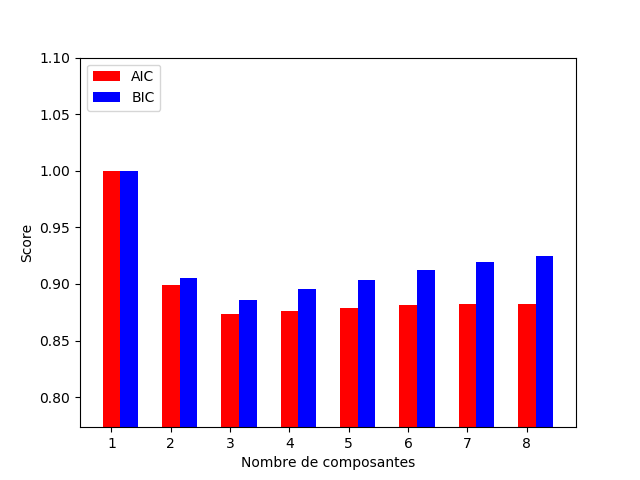

In [38]:
# Display aic and bic
xpos = np.arange(n_max)+1  # localisation des barres
largeur = 0.3              # largeur des barres
fig = plt.figure()
plt.ylim([min(np.concatenate((rbic,raic)))-0.1, 1.1])
plt.xlabel('Nombre de composantes')
plt.ylabel('Score')
plt.bar(xpos, raic, largeur, color='r', label="AIC")
plt.bar(xpos+largeur, rbic, largeur, color='b', label="BIC")
plt.legend(loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


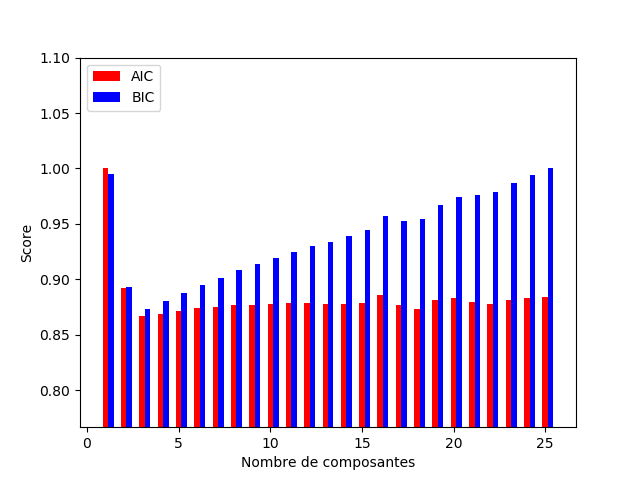

In [51]:
# Now we will use AIC and BIC to choose the number of components but with covariance type = diag
n_max = 25    # nombre de valeurs pour n_components
n_components_range = np.arange(n_max)+1
aic = []
bic = []
for n_comp in n_components_range:
    gmm = GaussianMixture(n_components=n_comp, covariance_type='diag').fit(md)
    aic.append(gmm.aic(md))
    bic.append(gmm.bic(md))
# normalizing aic and bic:
raic = aic/np.max(aic)
rbic = bic/np.max(bic)    
# Display aic and bic
xpos = np.arange(n_max)+1  # localisation des barres
largeur = 0.3              # largeur des barres
fig = plt.figure()
plt.ylim([min(np.concatenate((rbic,raic)))-0.1, 1.1])
plt.xlabel('Nombre de composantes')
plt.ylabel('Score')
plt.bar(xpos, raic, largeur, color='r', label="AIC")
plt.bar(xpos+largeur, rbic, largeur, color='b', label="BIC")
plt.legend(loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


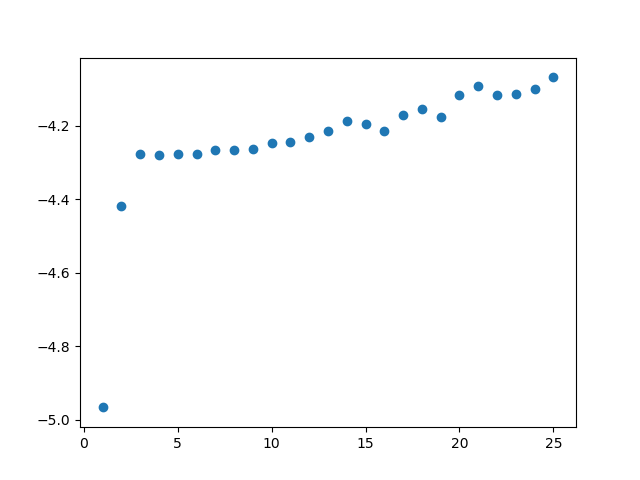

In [46]:
# Now we will use AIC and BIC to choose the number of components but with covariance type = diag
n_max = 25    # nombre de valeurs pour n_components
n_components_range = np.arange(n_max)+1
score_list2 = []
for n_comp in n_components_range:
    gmm = GaussianMixture(n_components=n_comp, covariance_type='diag').fit(md)
    aic.append(gmm.aic(md))
    bic.append(gmm.bic(md))
    score_list2.append(gmm.score(md))
    
fig7 = plt.figure()
ax7 = fig7.add_subplot(111)
ax7.scatter([i for i in range(1, n_max+1)], score_list2)
plt.show() 

In [102]:
# Using texture data projected on 2 first PCA axes
from sklearn.decomposition import PCA
textures = np.loadtxt('texture.dat')
pca = PCA().fit(textures[:,:40])
texturesp = pca.transform(textures[:,:40])

In [103]:
gmm = GaussianMixture(n_components=11,n_init=3).fit(texturesp[:,:2])
gmm.converged_

True

In [104]:
gmm.n_iter_

11

In [105]:
gmm.lower_bound_

-1.7779219038494933

In [106]:
# Prepare data
grid_size = 100
xmin = 1.3*np.min(texturesp[:,0])
xmax = 1.3*np.max(texturesp[:,0])
Gx = np.arange(xmin, xmax, (xmax-xmin)/grid_size)
ymin = 1.3*np.min(texturesp[:,1])
ymax = 1.3*np.max(texturesp[:,1])
Gy = np.arange(ymin, ymax, (ymax-ymin)/grid_size)
Gx, Gy = np.meshgrid(Gx, Gy)

In [107]:
density = np.exp(gmm.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis],
        (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))

<IPython.core.display.Javascript object>


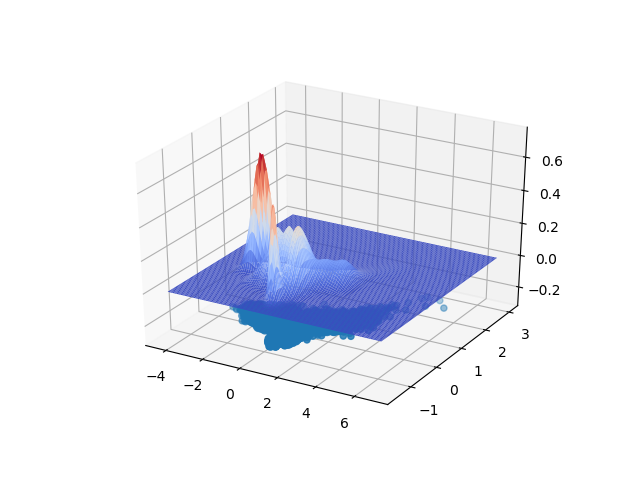

In [108]:
# Display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Gx, Gy, density.reshape(grid_size,grid_size), rstride=1,
                    cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.scatter(texturesp[:,0], texturesp[:,1], -0.25)
plt.show()

In [76]:
gmm.score(texturesp[:,:2])

-1.7766376064969052

<IPython.core.display.Javascript object>


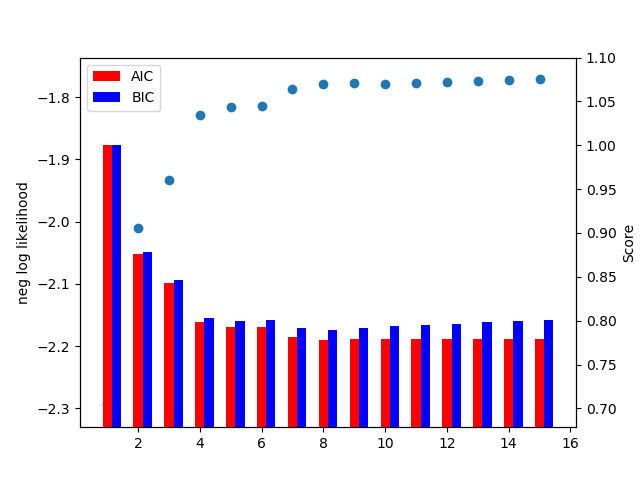

In [110]:
# Now we will use AIC and BIC to choose the number of components but with covariance type = diag
n_max = 15    # how many n_components
n_components_range = np.arange(n_max)+1
aic = []
bic = []
score_list3 = []
largeur = 0.3  
for n_comp in range(1, n_max + 1):
    gmm = GaussianMixture(n_components=n_comp,n_init=3).fit(texturesp[:,:2])
    aic.append(gmm.aic(texturesp[:,:2]))
    bic.append(gmm.bic(texturesp[:,:2]))
    score_list3.append(gmm.score(texturesp[:,:2]))
    
fig7 = plt.figure()
ax7 = fig7.add_subplot(111)
ax7.set_ylabel('neg log likelihood')
xpos = [i for i in range(1, n_max+1)]
xpos1 = [i + largeur  for i in range(1, n_max+1)]
ax7.scatter(xpos, score_list3)

raic = aic/np.max(aic)
rbic = bic/np.max(bic) 
# Display aic and bic
ax8 = ax7.twinx()
plt.ylim([min(np.concatenate((rbic,raic)))-0.1, 1.1])
plt.xlabel('Nombre de composantes')
plt.ylabel('Score')
plt.bar(xpos, raic, largeur, color='r', label="AIC")
plt.bar(xpos1, rbic, largeur, color='b', label="BIC")
plt.legend(loc='upper left')
plt.show()

In [96]:
# Using texture data after LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
textures = np.loadtxt('texture.dat')
lda = LinearDiscriminantAnalysis()
lda.fit(textures[:,:40], textures[:,40])
texturesl = lda.transform(textures[:,:40])

/home/jeslava/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [97]:
gmm = GaussianMixture(n_components=11,n_init=3).fit(texturesl[:,:2])

In [98]:
# Prepare data
grid_size = 100
xmin = 1.3*np.min(texturesl[:,0])
xmax = 1.3*np.max(texturesl[:,0])
Gx = np.arange(xmin, xmax, (xmax-xmin)/grid_size)
ymin = 1.3*np.min(texturesl[:,1])
ymax = 1.3*np.max(texturesl[:,1])
Gy = np.arange(ymin, ymax, (ymax-ymin)/grid_size)
Gx, Gy = np.meshgrid(Gx, Gy)

In [99]:
density = np.exp(gmm.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis],
        (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))

<IPython.core.display.Javascript object>


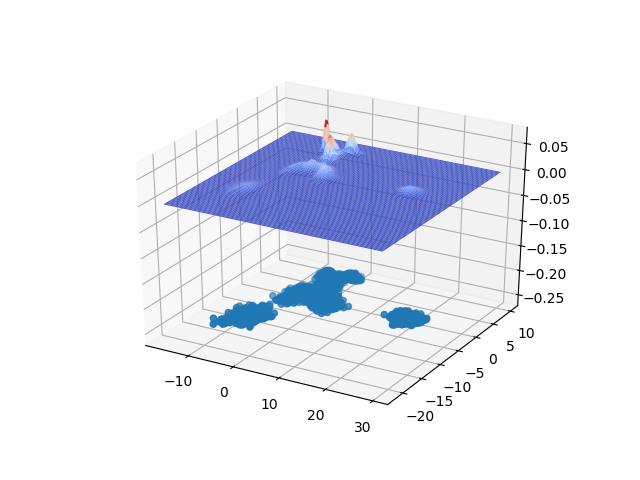

In [100]:
# Display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Gx, Gy, density.reshape(grid_size,grid_size), rstride=1,
                    cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.scatter(texturesl[:,0], texturesl[:,1], -0.25)
plt.show()

In [66]:
gmm.score(texturesl[:,:2])

-4.638533402952192

<IPython.core.display.Javascript object>


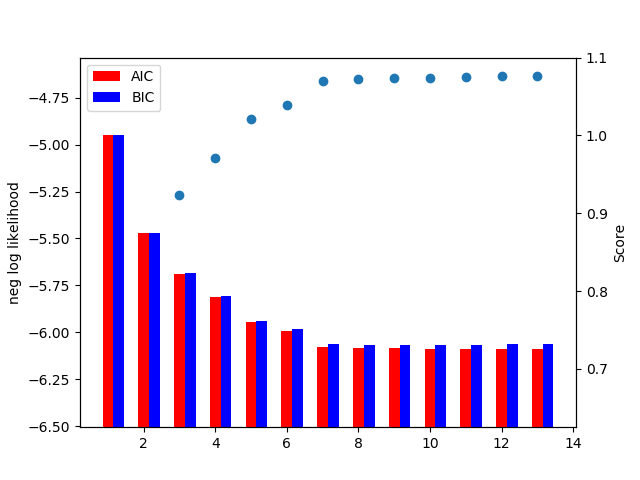

In [101]:
n_max = 13    # how many n_components
n_components_range = np.arange(n_max)+1
aic = []
bic = []
score_list3 = []
largeur = 0.3  
for n_comp in range(1, n_max + 1):
    gmm = GaussianMixture(n_components=n_comp,n_init=3).fit(texturesl[:,:2])
    aic.append(gmm.aic(texturesl[:,:2]))
    bic.append(gmm.bic(texturesl[:,:2]))
    score_list3.append(gmm.score(texturesl[:,:2]))
    
fig7 = plt.figure()
ax7 = fig7.add_subplot(111)
ax7.set_ylabel('neg log likelihood')
xpos = [i for i in range(1, n_max+1)]
xpos1 = [i + largeur  for i in range(1, n_max+1)]
ax7.scatter(xpos, score_list3)

raic = aic/np.max(aic)
rbic = bic/np.max(bic) 
# Display aic and bic
ax8 = ax7.twinx()
plt.ylim([min(np.concatenate((rbic,raic)))-0.1, 1.1])
plt.xlabel('Nombre de composantes')
plt.ylabel('Score')
plt.bar(xpos, raic, largeur, color='r', label="AIC")
plt.bar(xpos1, rbic, largeur, color='b', label="BIC")
plt.legend(loc='upper left')
plt.show()